<a href="https://colab.research.google.com/github/leman-cap13/my_projects/blob/main/Time_Series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chirag19/air-passengers

Dataset URL: https://www.kaggle.com/datasets/chirag19/air-passengers
License(s): unknown


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/air-passengers.zip','r') as zip_file:
  zip_file.extractall()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Check the first few rows
print(data.head())


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


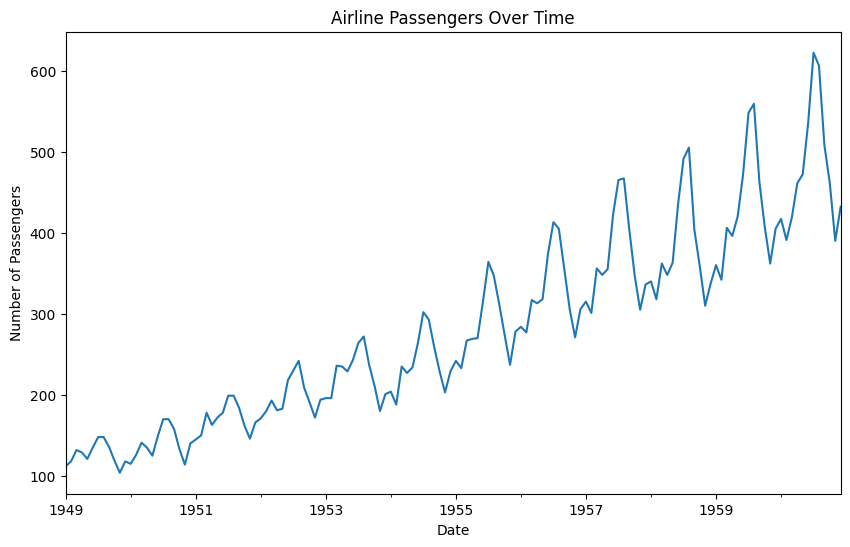

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series
data['#Passengers'].plot(figsize=(10, 6))
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [ ]:
# Trend:

# A trend refers to a long-term increase or decrease in the data.
#In the case of airline passengers, you might notice that the number of passengers generally increases over time.
#If you see a steady upward or downward slope, that’s a trend.

# Seasonality:

# Seasonality is a repeating pattern or cycle in the data, often driven by external factors such as weather, holidays, or business cycles.
#For example, airline passengers may increase during summer months and holiday seasons.

# In the plot, seasonality would appear as regular, repeating upward and downward fluctuations in the data at consistent intervals
 #(e.g., every year).

# Anomalies:

# Anomalies are sudden and unusual spikes or drops in the data that don’t follow the regular trend or seasonal patterns.
#These might be caused by outliers, data errors, or unexpected events (e.g., a sharp drop in passengers due to
#an economic crisis or a natural disaster).

# In the plot, anomalies would show up as sudden peaks or valleys that don’t fit the overall trend or seasonality.

In [ ]:
# Ensure the 'Month' column is in datetime format
data.index = pd.to_datetime(data.index)
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

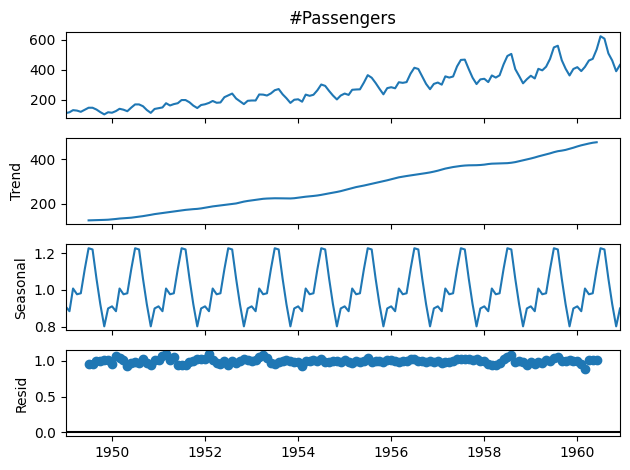

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data['#Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
result.plot()
plt.show()


When you decompose a time series, you're essentially breaking it down into three parts:

Trend: This represents the long-term movement in the data (e.g., if the number of passengers is generally increasing over time).

Seasonality: This captures the repeating patterns or cycles at regular intervals (e.g., if passenger numbers tend to go up every summer or holiday season).

Residuals (Noise): This is what’s left after removing the trend and seasonality. It includes random fluctuations that are hard to explain (e.g., sudden spikes or drops that don’t follow any pattern).

Here's what's happening in the code:
seasonal_decompose(data['#Passengers'], model='multiplicative', period=12):

This function decomposes the time series into the three parts: trend, seasonality, and residuals.

The model='multiplicative' means that the components are multiplied to get the original data (this is often used when the seasonal effect grows as the data increases).

period=12 tells the function that the data has a yearly seasonal pattern (since there are 12 months in a year).

result.plot():

This plots the three decomposed components on separate graphs:

Trend: A line showing the overall direction of the data.

Seasonality: A pattern showing how the data fluctuates on a regular basis.

Residuals: The "noise" or random fluctuations that don’t fit the trend or seasonality.

What you’ll see in the plot:
The Trend graph will show if there’s a general upward or downward movement in passenger numbers.

The Seasonality graph will show any repeating cycles (like higher passenger numbers in certain months every year).

The Residuals graph will show random noise—hopefully, it should look like random fluctuations around zero if the decomposition was successful.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test
result = adfuller(data['#Passengers'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


If the p-value is less than 0.05, the series is likely stationary.

If the p-value is greater than 0.05, the series is likely non-stationary, and you’ll need to difference the data to make it stationary.

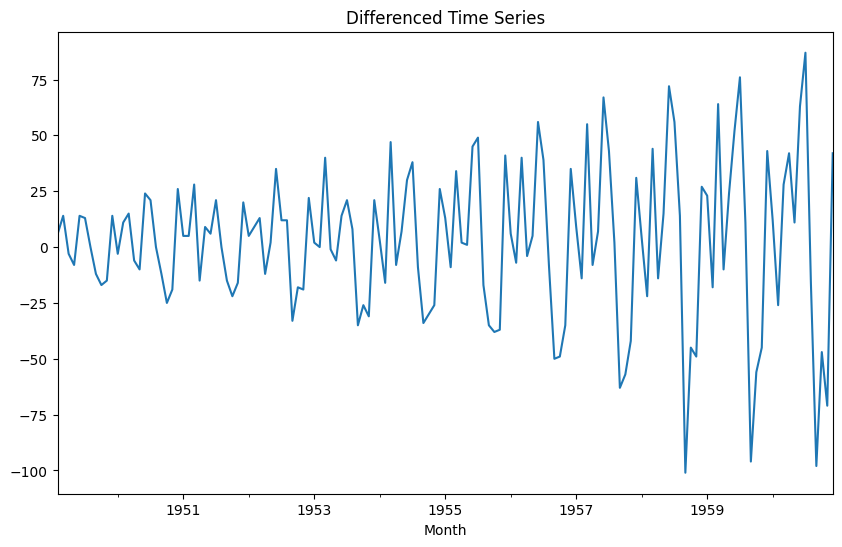

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [ ]:
# First difference
data_diff = data['#Passengers'].diff().dropna()

# Plot the differenced series
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series')
plt.show()

# Re-run the ADF test to check if it's stationary
result = adfuller(data_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


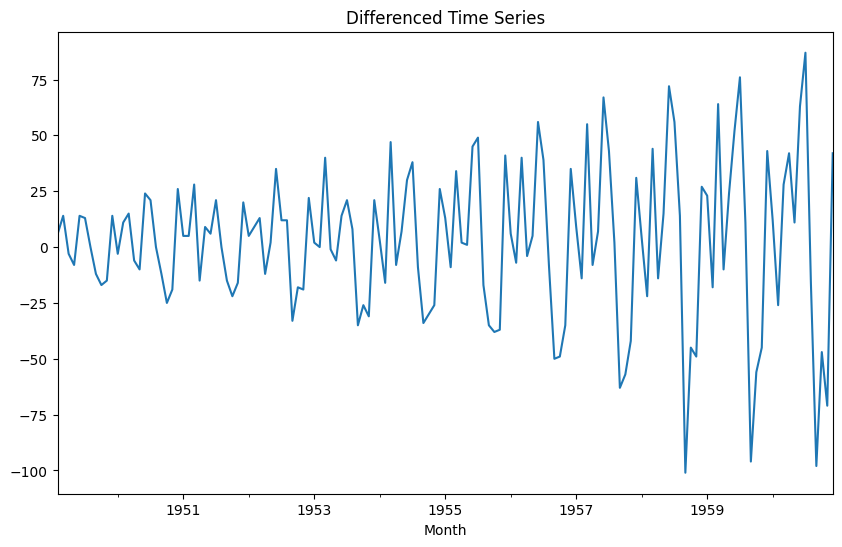

In [ ]:
# Birinci fərq (First difference) tətbiq edirik
data_diff = data['#Passengers'].diff().dropna()

# Yeni fərqləndirilmiş seriyanı qrafiklə göstəririk
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series')
plt.show()


In [ ]:
# ADF testi tətbiq edirik
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


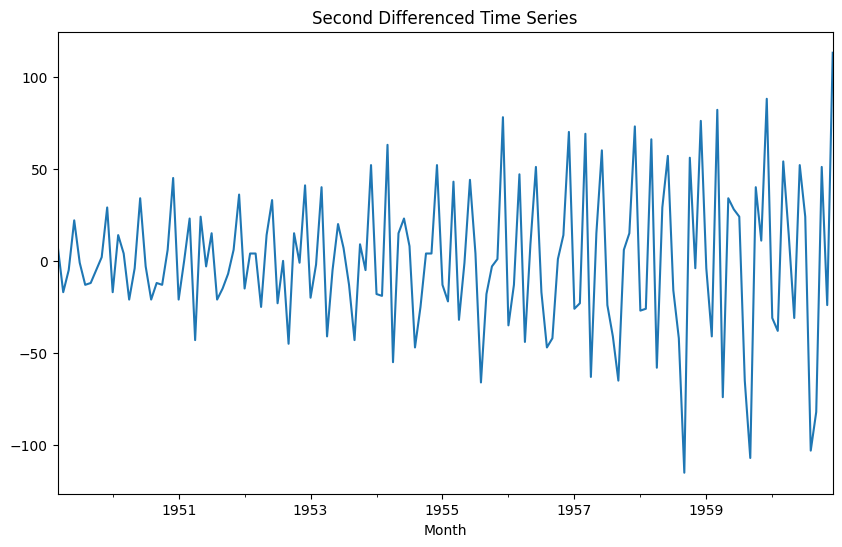

In [ ]:
# İkinci fərq (Second difference) tətbiq edirik
data_diff2 = data_diff.diff().dropna()

# Yeni fərqləndirilmiş seriyanı qrafiklə göstəririk
data_diff2.plot(figsize=(10, 6))
plt.title('Second Differenced Time Series')
plt.show()


In [ ]:
# İkinci fərq üçün ADF testi tətbiq edirik
result = adfuller(data_diff2)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Orijinal seriyanın stasionar hala gətirildiyini fərz edirik.
# I = 2 (2 dəfə differencing etdik).

# ARIMA modeli quraq: ARIMA(p,d,q)
# p = 1 (AR hissəsi) — keçmiş dəyərlərə baxır.
# d = 2 (differencing sayı) — stasionarlaşdırmaq üçün.
# q = 1 (MA hissəsi) — keçmiş səhvlərə baxır.

model = ARIMA(data['#Passengers'], order=(1, 2, 1))
model_fit = model.fit()

# Model nəticəsini çap edək
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -696.464
Date:                Wed, 16 Apr 2025   AIC                           1398.928
Time:                        14:35:00   BIC                           1407.796
Sample:                    01-01-1949   HQIC                          1402.532
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.894     -0.170      0.865     -12.551      10.552
sigma2      1034.0009   6133.239      0.169      0.8

In [ ]:
# Gələcək 12 ay üçün proqnoz verək
forecast = model_fit.forecast(steps=12)
print(forecast)


1961-01-01    446.776968
1961-02-01    453.034339
1961-03-01    456.625454
1961-04-01    459.382150
1961-05-01    461.877710
1961-06-01    464.291546
1961-07-01    466.679806
1961-08-01    469.060062
1961-09-01    471.437813
1961-10-01    473.814780
1961-11-01    476.191502
1961-12-01    478.568147
Freq: MS, Name: predicted_mean, dtype: float64


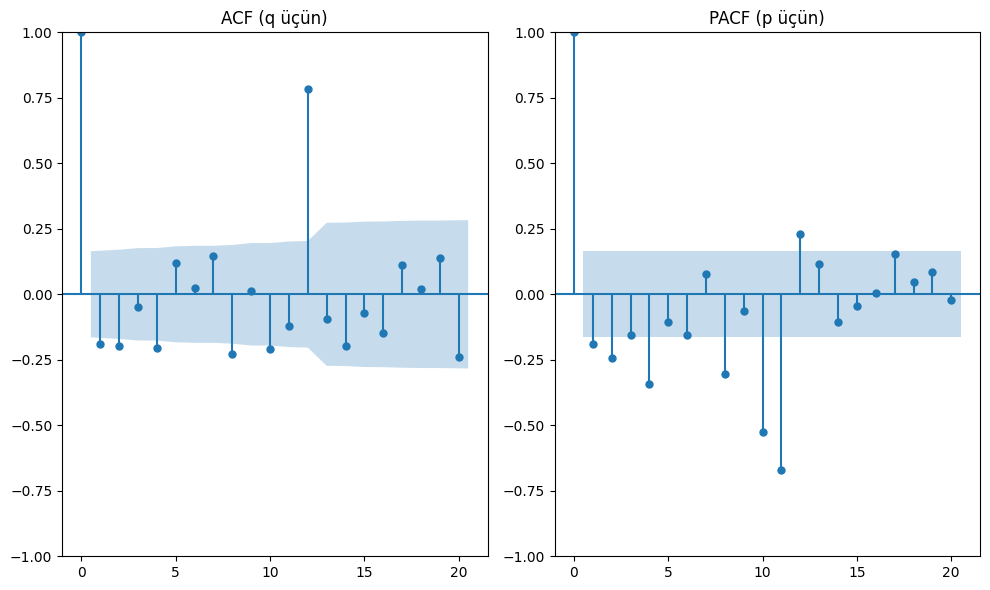

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Əgər seriya stasionar hala gətirilmişdirsə (2 dəfə differencing):
diff_data = data['#Passengers'].diff().diff().dropna()

plt.figure(figsize=(10,6))

# Autocorrelation Function (ACF) - q qismindəki gecikmə (lags) üçün kömək edir
plt.subplot(1, 2, 1)
plot_acf(diff_data, lags=20, ax=plt.gca())
plt.title('ACF (q üçün)')

# Partial Autocorrelation Function (PACF) - p qismindəki gecikmə üçün kömək edir
plt.subplot(1, 2, 2)
plot_pacf(diff_data, lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF (p üçün)')

plt.tight_layout()
plt.show()


In [ ]:
# 80% train, 20% test bölmək
train_size = int(len(data) * 0.8)

train = data.iloc[:train_size]
test = data.iloc[train_size:]


In [ ]:
# Modeli train set-də qur
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['#Passengers'], order=(1, 2, 1))
model_fit = model.fit()

# Test set üçün proqnoz
forecast = model_fit.forecast(steps=len(test))

# MSE hesablamaq
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['#Passengers'], forecast)

print(f"Test MSE: {mse}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test MSE: 20550.84661276702


Test MSE: 20550.84661276702


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


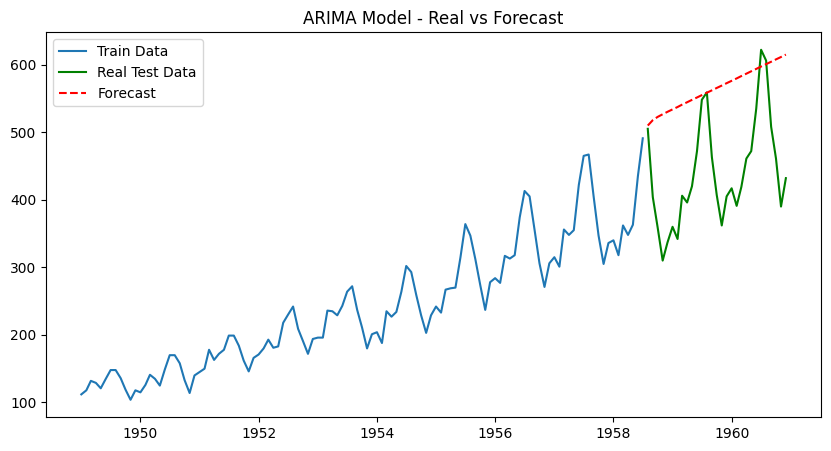

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dataseti yükləyək (əgər artıq yükləmisənsə, bu hissə keçərlidir)
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# 80% train, 20% test bölmək
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Modelin qurulması (misal üçün: ARIMA(1,2,1))
model = ARIMA(train['#Passengers'], order=(1,2,1))
model_fit = model.fit()

# Test üçün proqnoz (test setin uzunluğu qədər)
forecast = model_fit.forecast(steps=len(test))

# MSE hesablayırıq
mse = mean_squared_error(test['#Passengers'], forecast)
print(f"Test MSE: {mse}")

# Real və Proqnoz qrafiki
plt.figure(figsize=(10,5))
plt.plot(train.index, train['#Passengers'], label='Train Data')
plt.plot(test.index, test['#Passengers'], label='Real Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.legend()
plt.title('ARIMA Model - Real vs Forecast')
plt.show()


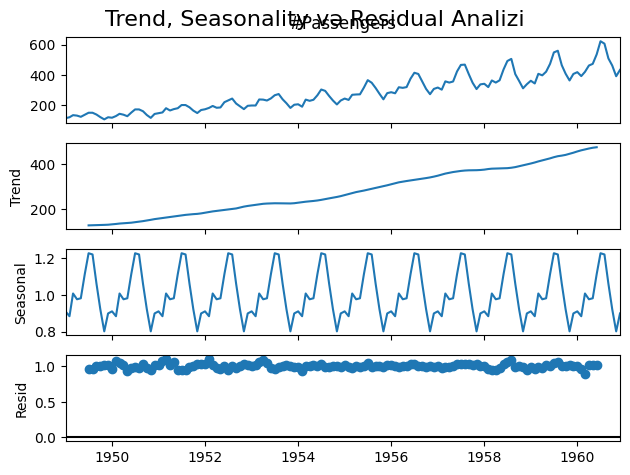

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Time Series decomposition (multiplicative model)
result = seasonal_decompose(data['#Passengers'], model='multiplicative', period=12)

# Plot trend, seasonality və residuals
result.plot()
plt.suptitle('Trend, Seasonality və Residual Analizi', fontsize=16)
plt.show()


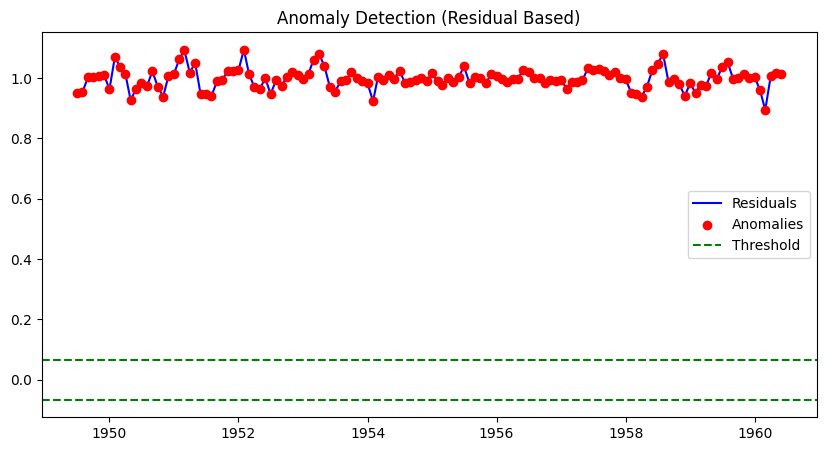

In [ ]:
import numpy as np

residual = result.resid.dropna()

threshold = 2 * np.std(residual)  # sadə threshold
anomalies = residual[np.abs(residual) > threshold]

plt.figure(figsize=(10,5))
plt.plot(residual.index, residual, label='Residuals', color='blue')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies', zorder=3)
plt.axhline(threshold, color='green', linestyle='--', label='Threshold')
plt.axhline(-threshold, color='green', linestyle='--')
plt.legend()
plt.title('Anomaly Detection (Residual Based)')
plt.show()


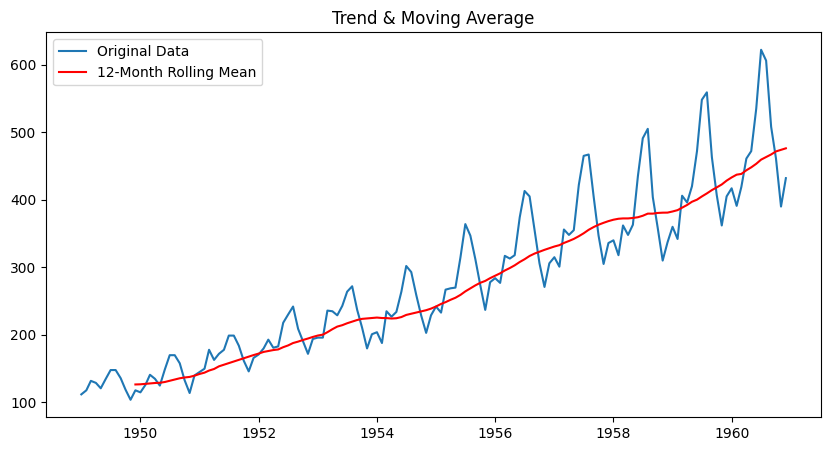

In [ ]:
rolling_mean = data['#Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'], label='Original Data')
plt.plot(rolling_mean, label='12-Month Rolling Mean', color='red')
plt.legend()
plt.title('Trend & Moving Average')
plt.show()


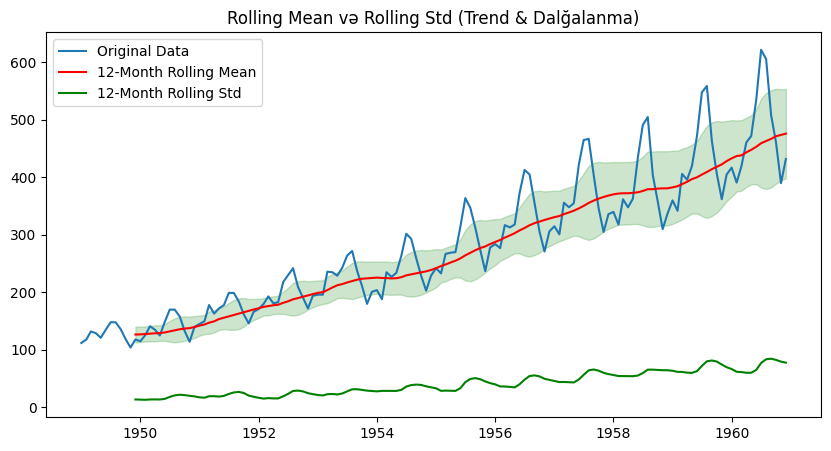

In [ ]:
# Rolling mean (trend)
rolling_mean = data['#Passengers'].rolling(window=12).mean()

# Rolling standard deviation (dalğalanmalar)
rolling_std = data['#Passengers'].rolling(window=12).std()

# Plot trend və std
plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'], label='Original Data')  # Real data
plt.plot(rolling_mean, label='12-Month Rolling Mean', color='red')  # Trend
plt.plot(rolling_std, label='12-Month Rolling Std', color='green')  # Std (fluktuasiyalar)
plt.fill_between(data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='green', alpha=0.2)
plt.legend()
plt.title('Rolling Mean və Rolling Std (Trend & Dalğalanma)')
plt.show()


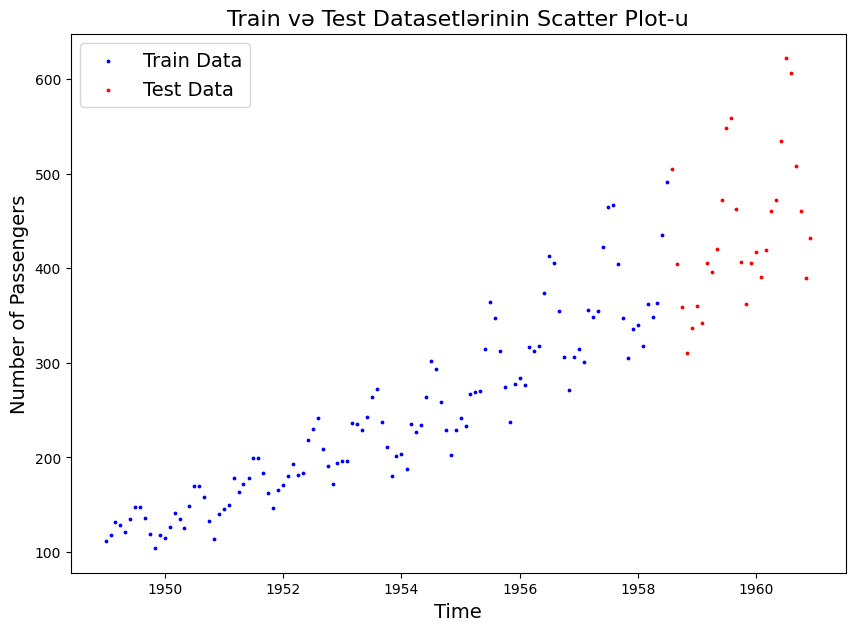

In [ ]:
import matplotlib.pyplot as plt

# Train və test üçün scatter plot yaratmaq
plt.figure(figsize=(10,7))

# Train və Test datasetləri üçün scatter nöqtələrini əlavə edirik
plt.scatter(train.index, train['#Passengers'], s=3, label='Train Data', color='blue')  # Train data
plt.scatter(test.index, test['#Passengers'], s=3, label='Test Data', color='red')   # Test data

# Ox etiketləri
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Legend əlavə edirik
plt.legend(fontsize=14)

# Qrafik başlığı
plt.title('Train və Test Datasetlərinin Scatter Plot-u', fontsize=16)
plt.show()


train.index və test.index: Bu, train və test datasetlərinin tarixlərini göstərir. #Passengers isə hər bir zaman üçün yolçu sayını göstərir.

s=5: Scatter nöqtələrinin ölçüsünü tənzimləyir.

label: Legend üçün adlar.

color: Train və test datasetlərini fərqləndirmək üçün rəngləri müəyyən edir (mavi və qırmızı).

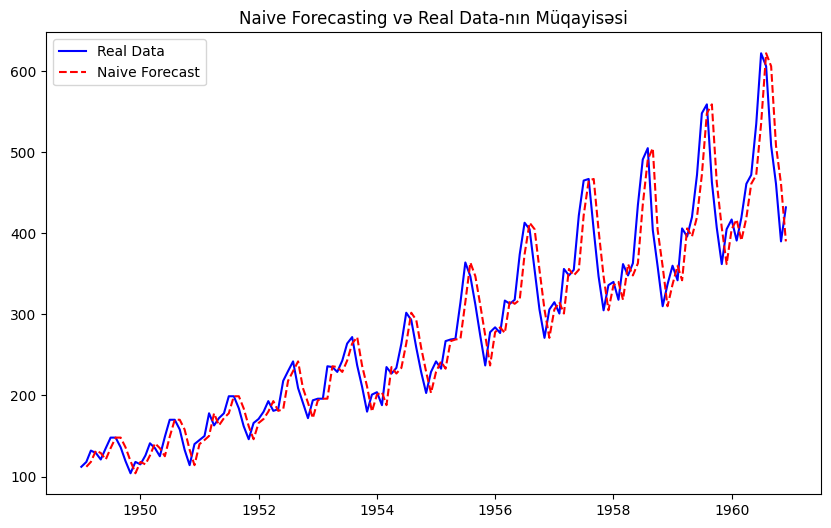

In [ ]:
# Naive Forecasting üçün son dəyəri təkrarlayırıq
data['Naive_Forecast'] = data['#Passengers'].shift(1)

# Proqnoz və real verilənləri müqayisə edirik
plt.figure(figsize=(10,6))
plt.plot(data['#Passengers'], label='Real Data', color='blue')
plt.plot(data['Naive_Forecast'], label='Naive Forecast', color='red', linestyle='--')
plt.legend()
plt.title('Naive Forecasting və Real Data-nın Müqayisəsi')
plt.show()


Naive Forecasting (Sadə Proqnozlaşdırma) metodunun nə olduğunu başa düşmək, zaman seriyalı verilənlərə əsaslanan proqnozların təməl prinsiplərini anlamaya kömək edəcək.

🔥 Naive Forecasting nədir?
Naive Forecasting, ən sadə və əsas proqnozlaşdırma metodudur. Bu metodda növbəti dəyəri proqnozlaşdırmaq üçün keçmişdəki son dəyəri istifadə edirik.

🎯 Sadə prinsiplə necə işləyir?
Növbəti dəyər keçmişdəki son real dəyər ilə eyni olur.

Yəni, əgər bu günün və ya əvvəlki ayın qiymətini bilirsənsə, gələn günün qiymətini olduğu kimi təkrarlayırsan.

📊 Formula:
𝑌
^
𝑡
+
1
=
𝑌
𝑡
Y
^
  
t+1
​
 =Y
t
​


Y_t: Cari dövrün (məsələn, bu ayın) dəyəri.

𝑌
^
𝑡
+
1
Y
^
  
t+1
​
 : Gələcək dövrün (məsələn, gələn ayın) proqnozu.

🧠 Misal:
Təsəvvür et, 2025-ci ilin yanvar ayında 1500 nəfər sərnişin olub (bu bizim Y_t-mizdir). Naive Forecasting metoduna əsasən, fevral ayı üçün proqnoz:
𝑌
^
𝑡
+
1
=
𝑌
𝑡
=
1500
Y
^
  
t+1
​
 =Y
t
​
 =1500 Beləliklə, fevral ayında da 1500 sərnişin olacağı təxmin edilir.

🔥 Naive Forecasting-in Əsas Xüsusiyyətləri:
Sadəlik: Bu metod çox sadədir və heç bir mürəkkəb hesablama tələb etmir.

Az performans: Bu metod daha mürəkkəb modellərdən çox zəifdir, çünki mövcud məlumatlara əsaslanaraq sadəcə keçmişdəki dəyəri təkrarlayır.

Bəzən effektiv: Bəzi sadə verilənlərdə, məsələn, qiymətlərdə böyük dəyişikliklər olmursa, naive proqnoz çox da pis nəticə verməyə bilər.

🧠 Misal 1:
Bir şirkət hər ay məhsul satışı edir. Son 3 ayın satışları:

Yanvar: 2000

Fevral: 2200

Mart: 2100

Bu metodla april ayı üçün proqnoz:
𝑌
^
𝑡
+
1
=
𝑌
𝑡
=
2100
Y
^
  
t+1
​
 =Y
t
​
 =2100

Yəni, april ayı üçün satış proqnozu 2100 olacaq.

📉 Naive Forecasting-in Limitləri:
Trend yoxdur: Əgər verilənlərdə artım və ya azalma varsa, Naive Forecast bu dəyişiklikləri nəzərə almaz.

Seasonality (mövsümi dəyişikliklər) yoxdur: Naive Forecast, mövsüm dəyişikliklərini və ya dövrü tendensiyaları nəzərə almaz.

----1. Moving Average (Hərəkətli Orta)
Hərəkətli Orta proqnozlaşdırma, keçmiş dövrlərin ortalamasını hesablama prinsipinə əsaslanır. Bu metod, xüsusilə sezonallıq və anomaliyalar olan zaman seriyaları üçün faydalıdır.

Sadə Hərəkətli Orta (SMA) və Ağırlıqlı Hərəkətli Orta (WMA) metodları var.

Misal: Əgər son 3 ayın ortalamasını istifadə edərək gələn ayı proqnozlaşdırırsansa, bu Hərəkətli Orta metodudur.

----2. Exponential Smoothing (Eksponensial Yumuşatma)
Bu metodda, əvvəlki dövrün dəyəri daha çox ağırlıqla hesablanır, yəni keçmiş məlumatlara daha böyük ağırlıq verilir.

Simple Exponential Smoothing (SES), Holt’s Linear Trend Model, Holt-Winters Seasonal Method kimi müxtəlif növləri var.

Holt-Winters (Multiplicative və Additive): Mövsümi dəyişiklikləri nəzərə alaraq proqnozlaşdırma edər.

Misal: Əgər verilənlərdə sezonallıq və trend varsa, Holt-Winters yaxşı işləyir.


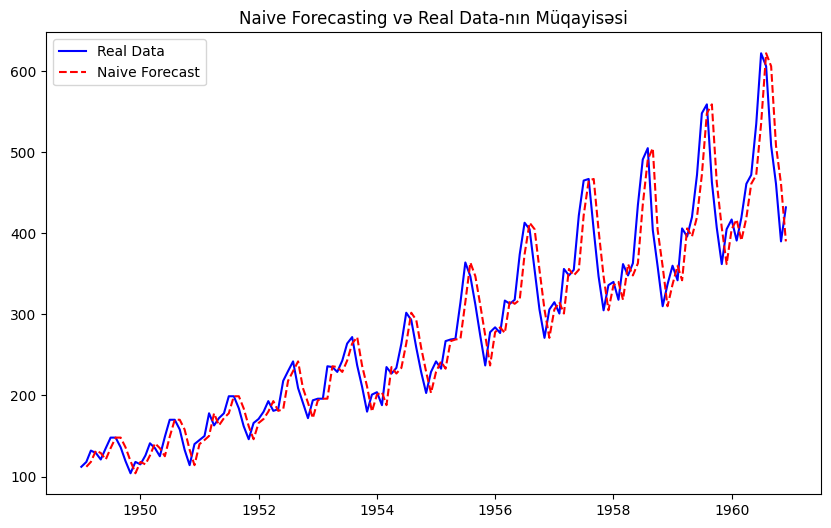

Naive Forecasting MSE: 1136.3916083916083


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Zaman seriyasını oxumaq
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=True, index_col='Month')

# Naive Forecasting tətbiq etmək (keçmiş dəyəri növbəti dövr üçün proqnoz olaraq alırıq)
data['Naive_Forecast'] = data['#Passengers'].shift(1)

# Proqnozlaşdırılan və real verilənləri müqayisə etmək
plt.figure(figsize=(10,6))
plt.plot(data['#Passengers'], label='Real Data', color='blue')
plt.plot(data['Naive_Forecast'], label='Naive Forecast', color='red', linestyle='--')
plt.legend()
plt.title('Naive Forecasting və Real Data-nın Müqayisəsi')
plt.show()

# Məlumatları müqayisə etmək üçün MSE (Mean Squared Error) hesablaya bilərik
from sklearn.metrics import mean_squared_error

# MSE hesablamaq (Naive Forecasting-in səhvi)
mse = mean_squared_error(data['#Passengers'][1:], data['Naive_Forecast'][1:])
print(f"Naive Forecasting MSE: {mse}")


In [ ]:
import tensorflow as tf
import numpy as np

# Funksiya yaradılması
def evaluate_preds(y_true, y_pred):
    # Yuxarıda verilənləri `float32` tipinə çeviririk
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Mean Absolute Error (MAE)
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Mean Squared Error (MSE)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Root Mean Squared Error (RMSE)
    rmse = tf.sqrt(mse)

    # Mean Absolute Percentage Error (MAPE)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

    # Naive Forecasting üçün MAE
    naive_pred = y_true[:-1]  # Naive Forecasting: Sonraki dövr keçmiş dövrün eynisi olacaq
    mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - naive_pred))  # 1-ci indeksdən başlayırıq

    # MASE hesablanması
    mase = mae / mae_naive

    # Nəticələri bir dictionary şəklində qaytarırıq
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': mape.numpy(),
        'mase': mase.numpy()
    }

# Məsələn, sizin test və ya təlim məlumatlarınızın proqnozları ilə müqayisə etmək
# Y_true - əsl dəyərlər, Y_pred - proqnozlaşdırılmış dəyərlər

y_true = np.array([100, 120, 130, 150, 160])  # Həqiqi dəyərlər
y_pred = np.array([110, 115, 140, 145, 158])  # Proqnozlaşdırılmış dəyərlər

# Funksiyanı çağırmaq
results = evaluate_preds(y_true, y_pred)

# Nəticələri çap edirik
print("Modelin qiymətləndirmə nəticələri:")
for metric, value in results.items():
    print(f"{metric}: {value}")


Modelin qiymətləndirmə nəticələri:
mae: 6.400000095367432
mse: 50.79999923706055
rmse: 7.127411842346191
mape: 5.288461685180664
mase: 0.4266666769981384


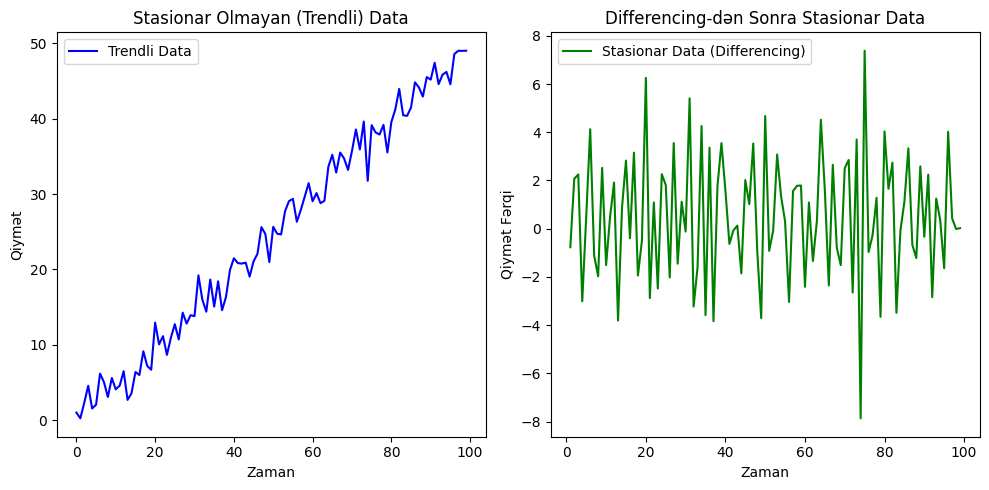

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Süni trendli zaman seriyası yaradırıq
np.random.seed(42)
time = np.arange(100)
trend = time * 0.5   # hər addımda artan trend
noise = np.random.normal(0, 2, 100)  # random səs
data = trend + noise

# Stasionar etmək üçün differencing
diff_data = pd.Series(data).diff().dropna()

# Vizual olaraq baxaq
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(time, data, label='Trendli Data', color='blue')
plt.title("Stasionar Olmayan (Trendli) Data")
plt.xlabel("Zaman")
plt.ylabel("Qiymət")
plt.legend()

plt.subplot(1,2,2)
plt.plot(diff_data, label='Stasionar Data (Differencing)', color='green')
plt.title("Differencing-dən Sonra Stasionar Data")
plt.xlabel("Zaman")
plt.ylabel("Qiymət Fərqi")
plt.legend()

plt.tight_layout()
plt.show()


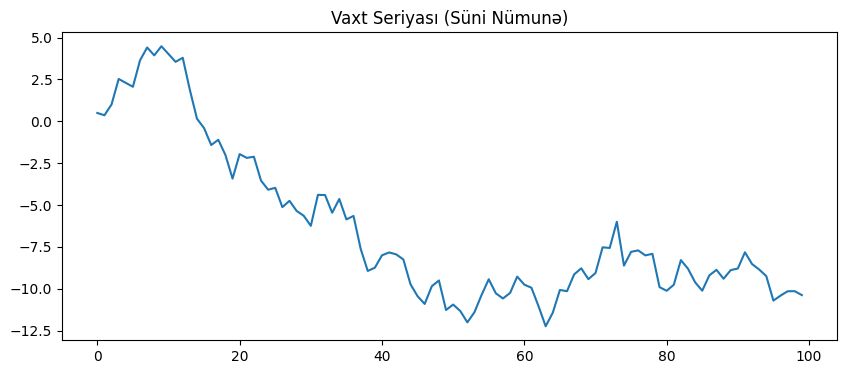

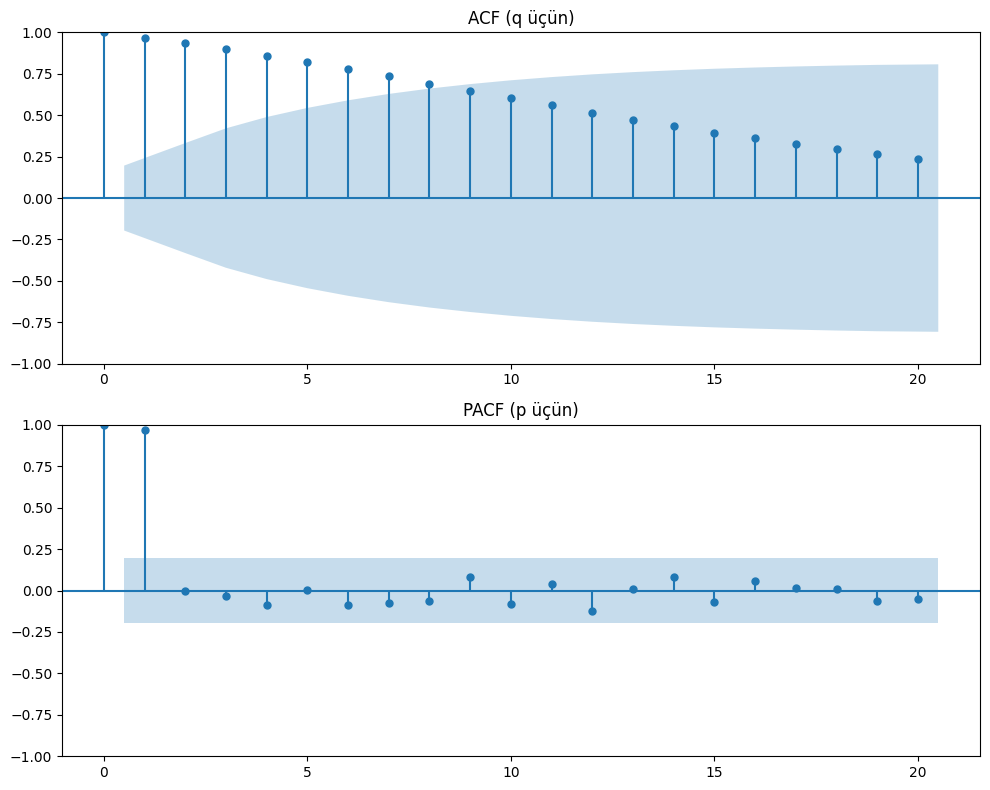

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Süni vaxt seriyası yaradırıq
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum())  # Random yürüş (trendli vaxt seriyası)

# Qrafikə baxırıq
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("Vaxt Seriyası (Süni Nümunə)")
plt.show()

# ACF və PACF qrafikləri
fig, ax = plt.subplots(2, 1, figsize=(10,8))

data_diff = data.diff().dropna()

# ACF qrafiki (q təyini üçün)
plot_acf(data, lags=20, ax=ax[0])
ax[0].set_title("ACF (q üçün)")

# PACF qrafiki (p təyini üçün)
plot_pacf(data, lags=20, ax=ax[1], method='ywm')
ax[1].set_title("PACF (p üçün)")

plt.tight_layout()
plt.show()


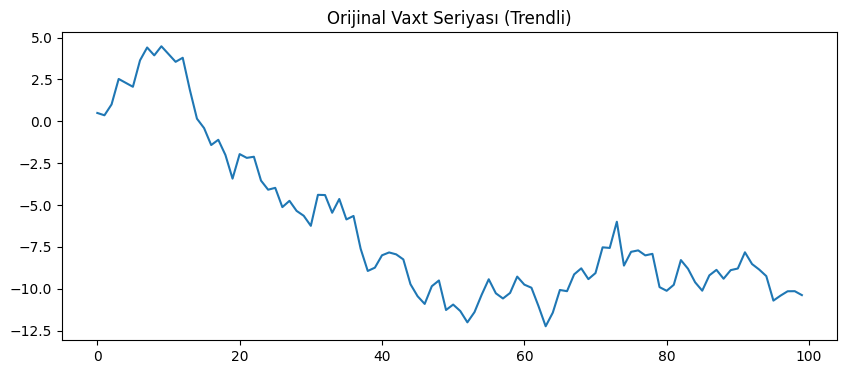

ADF Test Statistic: -1.3583317659818992
p-value: 0.6020814791099098


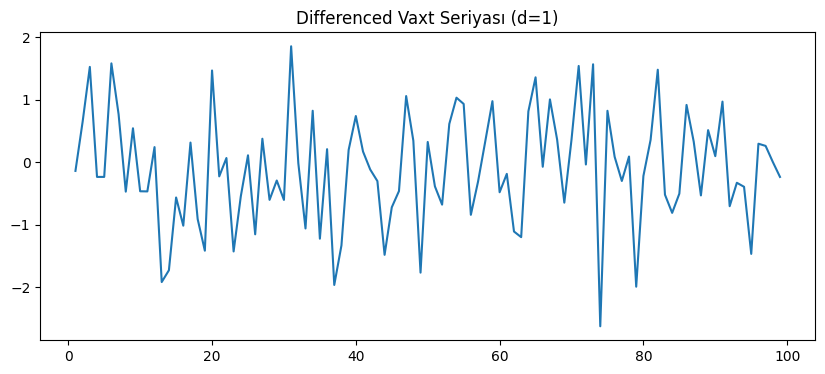

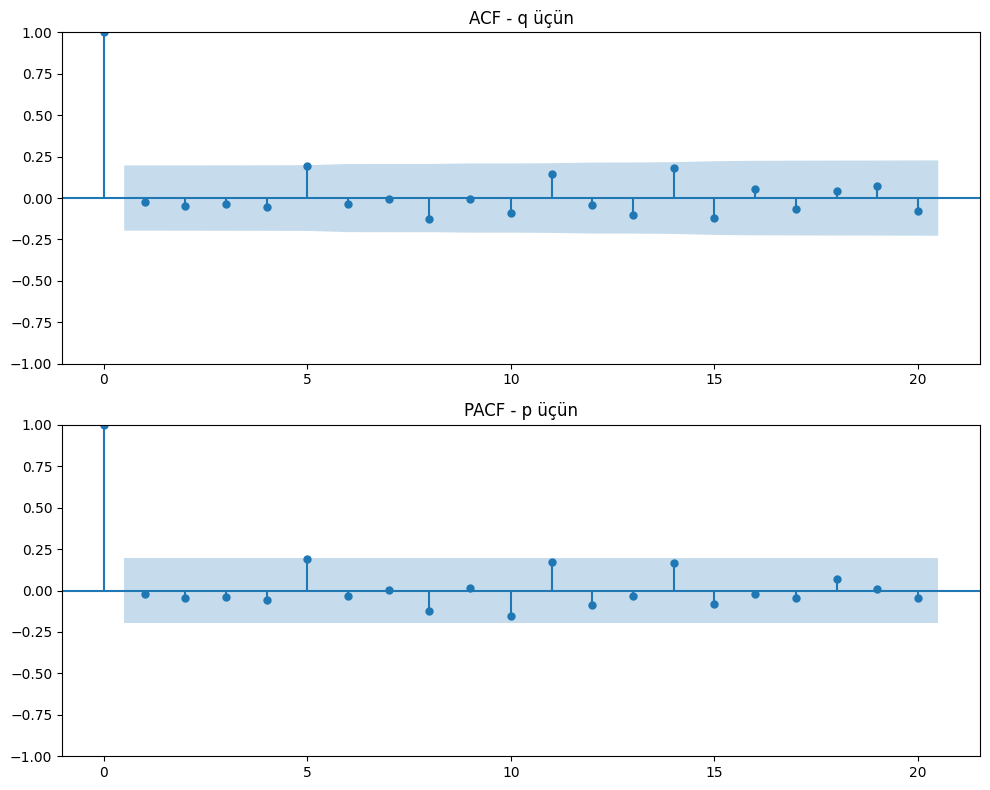

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Random cumsum vaxt seriyası (trendli data)
np.random.seed(42)
data = pd.Series(np.random.randn(100).cumsum())

# Orijinal datanın qrafiki
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Orijinal Vaxt Seriyası (Trendli)")
plt.show()

# ===========================
# Stasionarlıq testi (ADF test)
adf_result = adfuller(data)
print(f"ADF Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Əgər p-value > 0.05 isə => Stasionar deyil, differencing lazımdır
# ===========================

# Differencing (d=1)
data_diff = data.diff().dropna()

# Differenced datanın qrafiki
plt.figure(figsize=(10, 4))
plt.plot(data_diff)
plt.title("Differenced Vaxt Seriyası (d=1)")
plt.show()

# ===========================
# ACF və PACF qrafikləri

fig, ax = plt.subplots(2, 1, figsize=(10,8))

# ACF: q tapmaq üçün
plot_acf(data_diff, lags=20, ax=ax[0])
ax[0].set_title("ACF - q üçün")

# PACF: p tapmaq üçün
plot_pacf(data_diff, lags=20, ax=ax[1], method='ywm')
ax[1].set_title("PACF - p üçün")

plt.tight_layout()
plt.show()


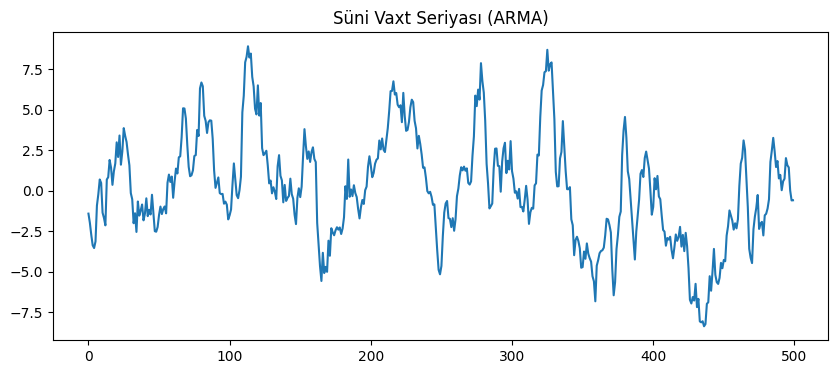

ADF Test Statistic: -4.226832690959474
p-value: 0.0005932766114097052


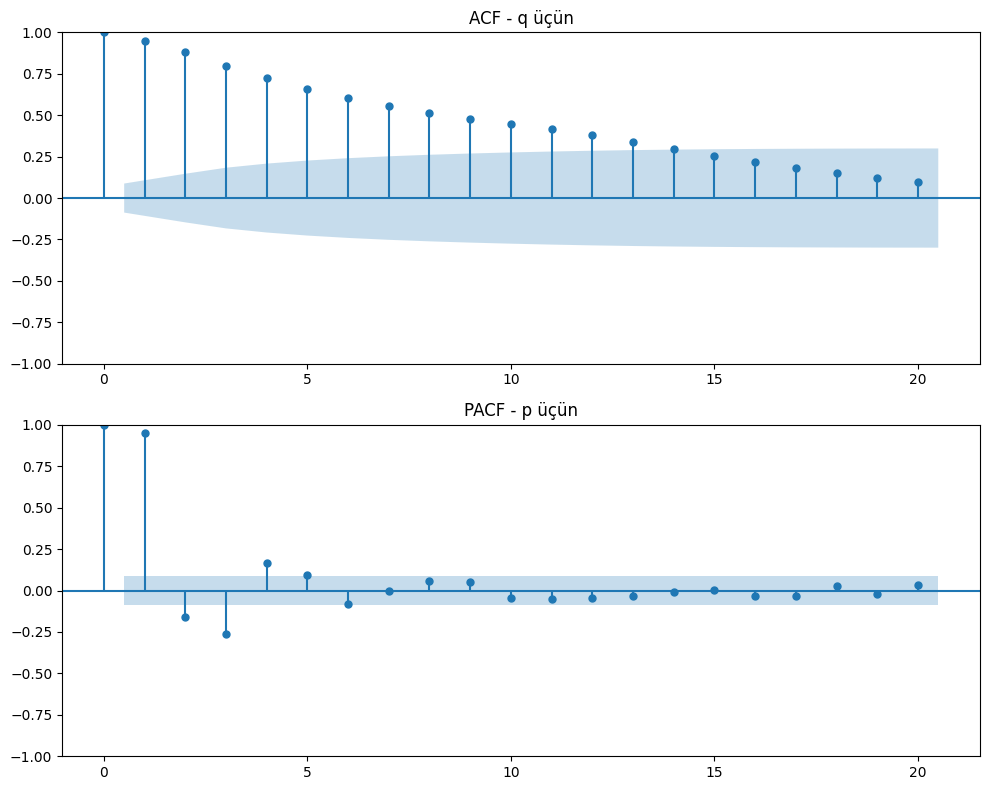

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Süni vaxt seriyası yaradırıq: AR(2) + MA(2) modelə uyğun data
from statsmodels.tsa.arima_process import ArmaProcess

# Model: AR(2), MA(2)
ar_params = np.array([1, -0.6, -0.3])  # AR lag1=0.6, lag2=0.3
ma_params = np.array([1, 0.5, 0.4])    # MA lag1=0.5, lag2=0.4

AR_object = ArmaProcess(ar_params, ma_params)
simulated_data = AR_object.generate_sample(nsample=500)

# DataFrame şəklinə salaq
data = pd.Series(simulated_data)

# Orijinal data qrafiki
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("Süni Vaxt Seriyası (ARMA)")
plt.show()

# =====================
# Stasionarlıq testi
result = adfuller(data)
print(f"ADF Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# p-value < 0.05 isə data stasionardır, d = 0
# =====================

# ACF və PACF qrafikləri ilə p və q tapmaq

fig, ax = plt.subplots(2, 1, figsize=(10,8))

# q üçün ACF
plot_acf(data, lags=20, ax=ax[0])
ax[0].set_title("ACF - q üçün")

# p üçün PACF
plot_pacf(data, lags=20, ax=ax[1], method='ywm')
ax[1].set_title("PACF - p üçün")

plt.tight_layout()
plt.show()


<ipython-input-1-f69b4f548f21>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


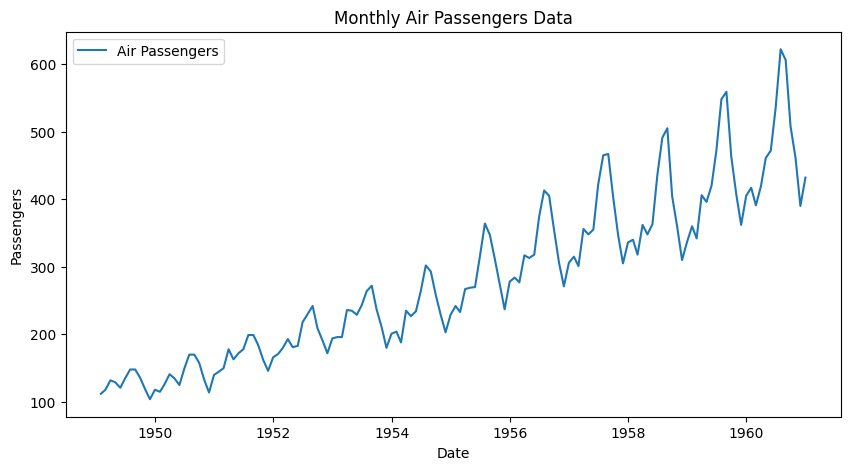

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Log-Likelihood: -694.3412526626241
AIC: 1394.6825053252483
BIC: 1403.5710392160279
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 21 Apr 2025   AIC                           1394.683
Time:                        08:08:49   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051     

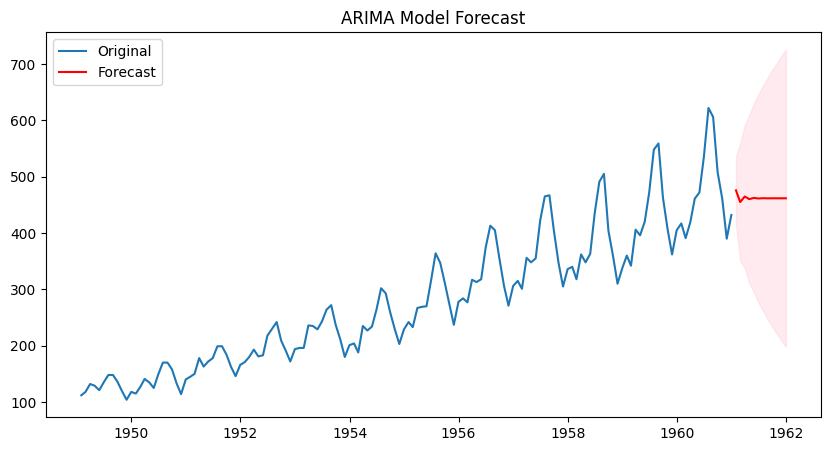

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 🔥 1. Data yükləyək
# Məsələn, AirPassengers datası:
data = sm.datasets.get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)

# Yalnız sərnişin sayı sütununu seçək
ts = data['value']

# 📊 2. Dataya baxış
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Air Passengers')
plt.title('Monthly Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# ⚙️ 3. ARIMA Modeli Qururuq (p,d,q) = (1,1,1)
model = sm.tsa.ARIMA(ts, order=(1,1,1))
result = model.fit()

# 📢 4. Model nəticələri
print("=====================================")
print("Log-Likelihood:", result.llf)  # log-likelihood
print("AIC:", result.aic)            # Akaike Information Criterion
print("BIC:", result.bic)            # Bayesian Information Criterion
print("=====================================")

# 💡 Əlavə olaraq: Model xülasəsi
print(result.summary())

# 📈 5. Proqnoz (son 12 ay üçün)
forecast = result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Nəticəni qrafikdə göstərək:
plt.figure(figsize=(10,5))
plt.plot(ts, label='Original')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


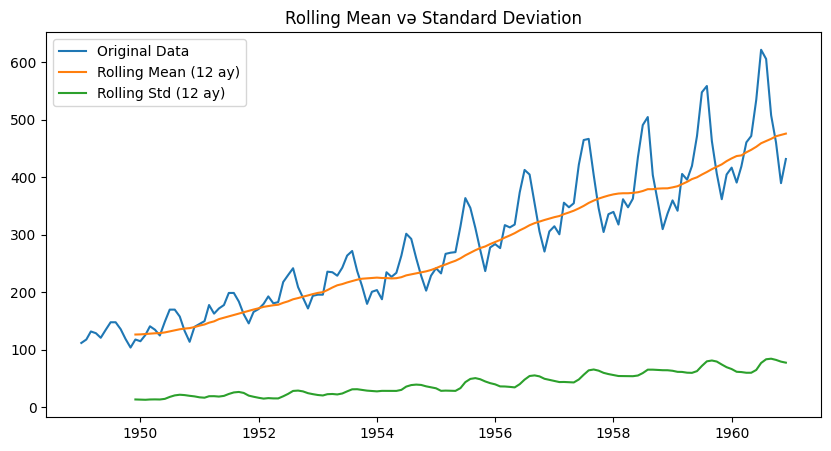

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 21 Apr 2025   AIC                           1394.683
Time:                        09:08:11   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

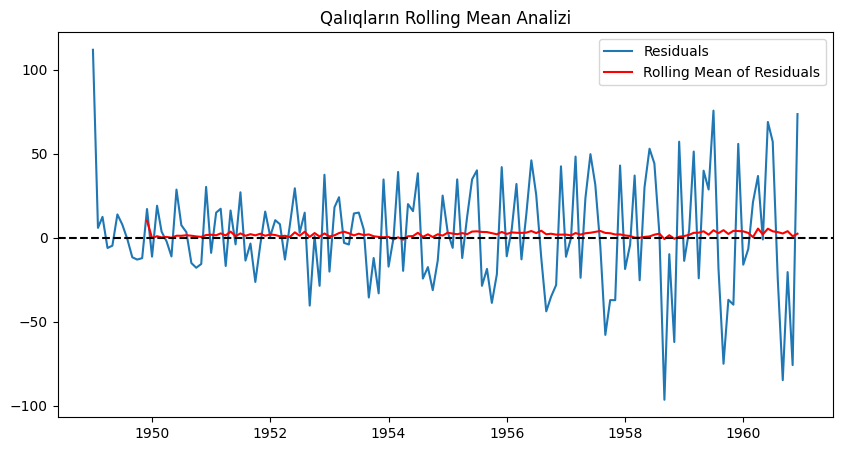

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 🧠 Misal üçün "AirPassengers" datası:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# 🎯 1. Rolling Mean və STD hesablayırıq
df['Rolling_Mean'] = df['Passengers'].rolling(window=12).mean()
df['Rolling_STD'] = df['Passengers'].rolling(window=12).std()

# 🔥 Rolling ilə Vizual analiz:
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(df['Rolling_Mean'], label='Rolling Mean (12 ay)')
plt.plot(df['Rolling_STD'], label='Rolling Std (12 ay)')
plt.legend()
plt.title('Rolling Mean və Standard Deviation')
plt.show()

# 🎯 2. ARIMA Model Qururuq (p,d,q) = (1,1,1)
model = ARIMA(df['Passengers'], order=(1,1,1))
model_fit = model.fit()

# Nəticələr
print(model_fit.summary())

# 🎯 3. Qalıqları (Residuals) hesablayırıq
residuals = model_fit.resid

# 🎯 4. Qalıqların Rolling Mean-inə baxırıq
plt.figure(figsize=(10,5))
plt.plot(residuals, label='Residuals')
plt.plot(residuals.rolling(window=12).mean(), label='Rolling Mean of Residuals', color='red')
plt.axhline(0, linestyle='--', color='black')
plt.legend()
plt.title('Qalıqların Rolling Mean Analizi')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Mon, 21 Apr 2025   AIC                           1022.299
Time:                                    09:33:26   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

<ipython-input-3-6eb722968b86>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Proqnoz')


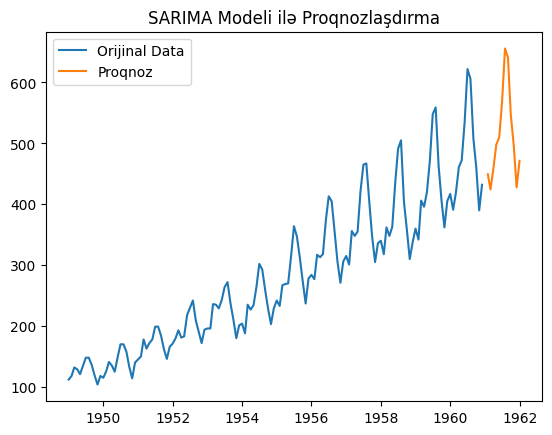

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Məlumatları yükləyirik (AirPassengers misalı)
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# SARIMA Modelini qururuq (p,d,q)(P,D,Q,S) parametrləri ilə
model = SARIMAX(df['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Model nəticələrini çap edirik
print(model_fit.summary())

# Proqnozlaşdırma
forecast = model_fit.forecast(steps=12)  # Növbəti 12 ay üçün proqnoz
plt.plot(df.index, df['Passengers'], label='Orijinal Data')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Proqnoz')
plt.legend()
plt.title('SARIMA Modeli ilə Proqnozlaşdırma')
plt.show()


In [ ]:
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Məlumatı yükləyirik
# data = pd.read_csv('your_timeseries.csv', parse_dates=True, index_col='date')

# # Tezlik (frequency) təyin edirik
# data = data.asfreq('M')  # Aylarla məlumatları qeyd edirik
# # Və ya
# # data = data.asfreq('D')  # Gündəlik məlumatları qeyd edirik

# # SARIMA Modelini qururuq
# sarima_model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))  # 12 ay mövsümü
# # Və ya
# # sarima_model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,365))  # 365 günlük mövsüm

# # Modeli uyğunlaşdırırıq
# result = sarima_model.fit()

# # Nəticələri əldə edirik
# print(result.summary())


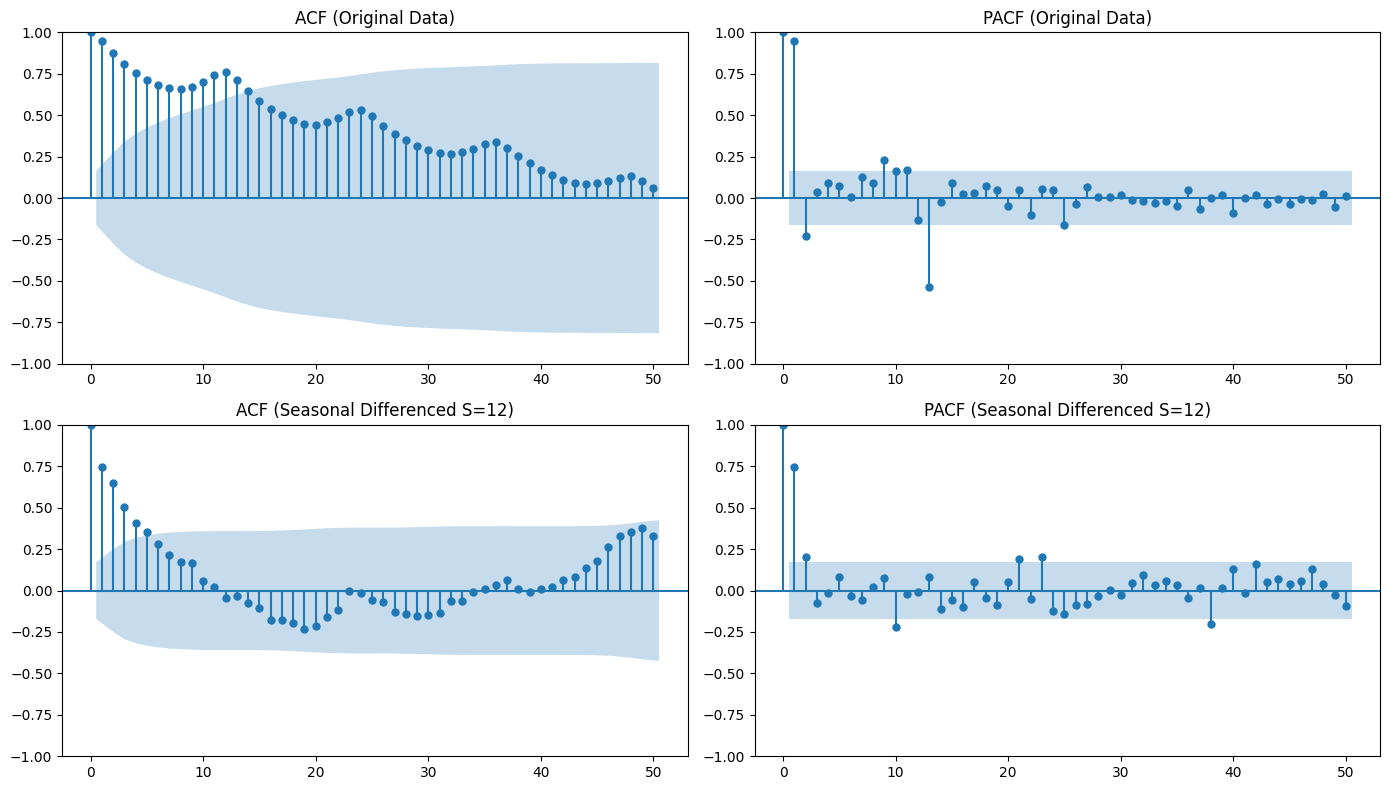

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# 🔥 Data nümunəsi (öz datasını da burada istifadə edə bilərsən)
# Məsələn AirPassengers datası
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# 👉 Mövsüm uzunluğunu qeyd edirik
season_length = 12

# 🎯 ACF və PACF vizuallaşdırma
fig, axes = plt.subplots(2, 2, figsize=(14,8))

# Qeyri-mövsümi ACF və PACF (orijinal data)
plot_acf(data['Passengers'], lags=50, ax=axes[0,0])
axes[0,0].set_title("ACF (Original Data)")

plot_pacf(data['Passengers'], lags=50, ax=axes[0,1])
axes[0,1].set_title("PACF (Original Data)")

# Mövsümi fərqlənmiş data
seasonal_diff = data['Passengers'].diff(season_length).dropna()

# Mövsümi üçün ACF və PACF
plot_acf(seasonal_diff, lags=50, ax=axes[1,0])
axes[1,0].set_title(f"ACF (Seasonal Differenced S={season_length})")

plot_pacf(seasonal_diff, lags=50, ax=axes[1,1])
axes[1,1].set_title(f"PACF (Seasonal Differenced S={season_length})")

plt.tight_layout()
plt.show()


     y     EMA_3
0  100  100.0000
1  102  101.0000
2  105  103.0000
3  103  103.0000
4  108  105.5000
5  110  107.7500
6  115  111.3750
7  117  114.1875


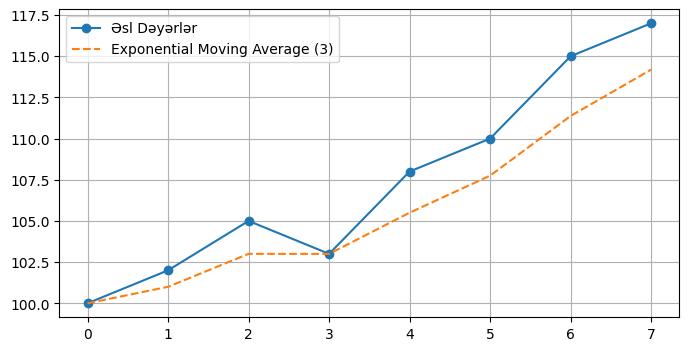

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Süni time series yaratmaq
data = {'y': [100, 102, 105, 103, 108, 110, 115, 117]}
df = pd.DataFrame(data)

# EMA hesablanması
df['EMA_3'] = df['y'].ewm(span=3, adjust=False).mean()

# Nəticə
print(df)

# Qrafiklə göstərək
plt.figure(figsize=(8,4))
plt.plot(df['y'], label='Əsl Dəyərlər', marker='o')
plt.plot(df['EMA_3'], label='Exponential Moving Average (3)', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


     y         SES
0  100  100.000000
1  102  100.000000
2  105  100.400000
3  103  101.320000
4  108  101.656000
5  110  102.924800
6  115  104.339840
7  117  106.471872


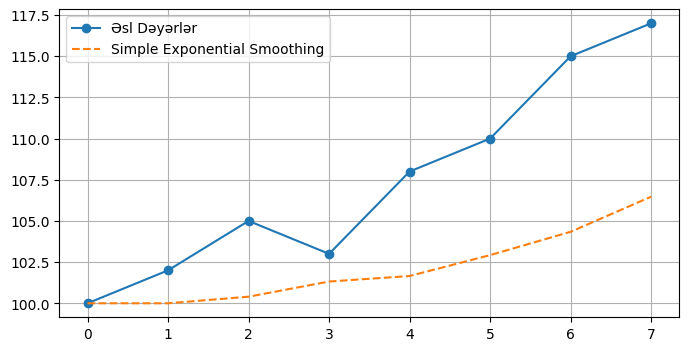

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Məsələn, time series datası
data = {'y': [100, 102, 105, 103, 108, 110, 115, 117]}
df = pd.DataFrame(data)

# Simple Exponential Smoothing (SES)
model_ses = SimpleExpSmoothing(df['y'])
model_fitted_ses = model_ses.fit(smoothing_level=0.2, optimized=False)  # smoothing_level: alpha

# Proqnozlaşdırılmış dəyərlər
df['SES'] = model_fitted_ses.fittedvalues

# Nəticə
print(df)

# Qrafiklə göstərək
plt.figure(figsize=(8,4))
plt.plot(df['y'], label='Əsl Dəyərlər', marker='o')
plt.plot(df['SES'], label='Simple Exponential Smoothing', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Satış məlumatları (zaman seriyası)
data = {'Sales': [100, 110, 115, 120, 130, 125, 140, 150]}
df = pd.DataFrame(data)

# SES Modelini qururuq
model = SimpleExpSmoothing(df['Sales'])
fitted_model = model.fit(smoothing_level=0.2, optimized=False)  # alpha=0.2

# Model uyğunlaşdırılmış dəyərlər (proqnoz)
df['Predicted'] = fitted_model.fittedvalues

# Gələcək 3 ay üçün proqnoz:
forecast = fitted_model.forecast(steps=3)

print("Gələcək 3 ay üçün proqnoz:")
print(forecast)


Gələcək 3 ay üçün proqnoz:
8     125.817728
9     125.817728
10    125.817728
dtype: float64


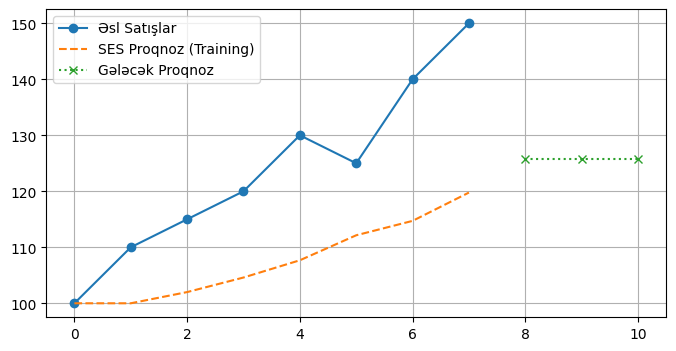

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df['Sales'], label='Əsl Satışlar', marker='o')
plt.plot(df['Predicted'], label='SES Proqnoz (Training)', linestyle='--')

# Gələcək proqnozlar
future_index = range(len(df), len(df) + len(forecast))
plt.plot(future_index, forecast, label='Gələcək Proqnoz', marker='x', linestyle='dotted')

plt.legend()
plt.grid(True)
plt.show()


<ipython-input-5-cf394c3775c4>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame({'Passengers': data.value.values}, index=pd.date_range(start='1949-01-01', periods=len(data), freq='M'))


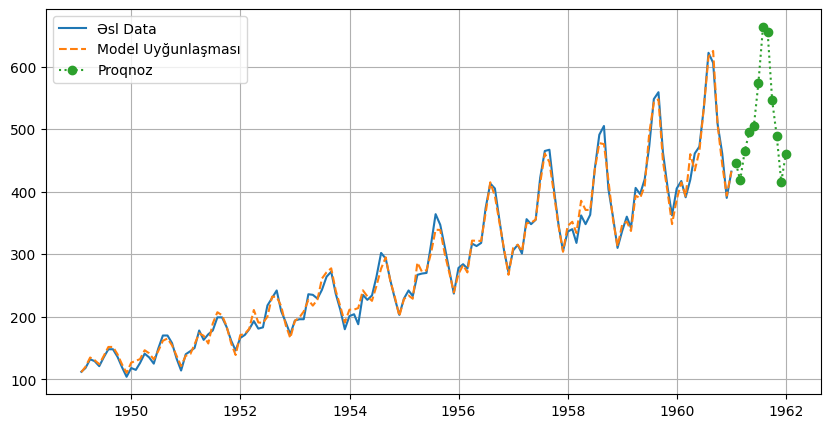

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# AirPassengers datasını yükləyirik
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers', 'datasets').data

# Data zaman seriyası şəklində
df = pd.DataFrame({'Passengers': data.value.values}, index=pd.date_range(start='1949-01-01', periods=len(data), freq='M'))

# Holt-Winters modeli (multiplicative seasonality, trend ilə)
model = ExponentialSmoothing(df['Passengers'],
                              trend='add',          # trend komponenti
                              seasonal='mul',       # mövsümi komponent
                              seasonal_periods=12)  # 12 ay mövsüm dövrü

fitted_model = model.fit()

# Gələcək 12 ay üçün proqnoz
forecast = fitted_model.forecast(steps=12)

# Qrafiklə göstərək
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Əsl Data')
plt.plot(fitted_model.fittedvalues, label='Model Uyğunlaşması', linestyle='--')
plt.plot(forecast, label='Proqnoz', linestyle='dotted', marker='o')
plt.legend()
plt.grid(True)
plt.show()


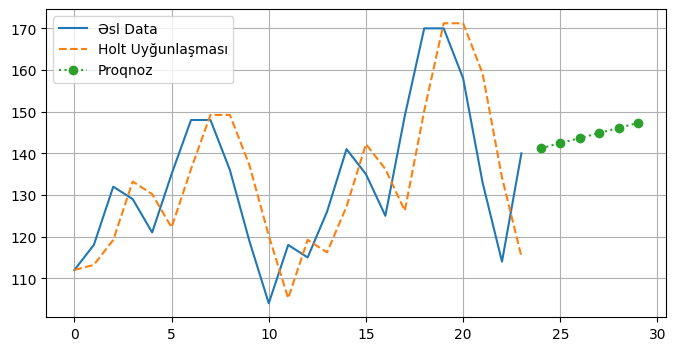

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data nümunəsi
data = [112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140]

df = pd.Series(data)

# Holt Modeli qururuq (Trend VAR, Seasonality YOX)
holt_model = ExponentialSmoothing(df, trend='add', seasonal=None).fit()

# Gələcək 6 addım üçün proqnoz
forecast = holt_model.forecast(steps=6)

# Qrafiklə göstərək
plt.figure(figsize=(8,4))
plt.plot(df, label='Əsl Data')
plt.plot(holt_model.fittedvalues, label='Holt Uyğunlaşması', linestyle='--')
plt.plot(forecast, label='Proqnoz', linestyle='dotted', marker='o')
plt.legend()
plt.grid(True)
plt.show()
